In [42]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [43]:
(x_train,y_train) , (x_test,y_test)=keras.datasets.mnist.load_data()

In [60]:
print(len(x_train))
print(len(x_test))
x_train=x_train/255
x_test=x_test/255

60000
10000


In [61]:
x_train[0].shape

(28, 28)

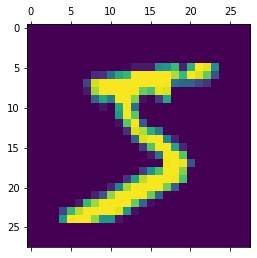

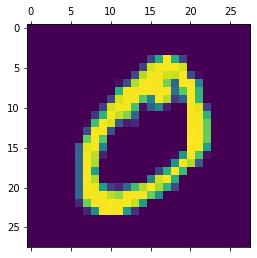

In [62]:
plt.matshow(x_train[0])
plt.matshow(x_train[1])

In [63]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
print("X Train Flatten:\n",x_train_flatten[0])

X Train Flatten:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.  

In [64]:
x_test_flatten=x_test.reshape(len(x_test),28*28)
print("X Test Flatten:\n",x_test_flatten[0])

X Test Flatten:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.   

In [65]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flatten,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4706 - accuracy: 0.8762: 1s - loss: - ETA: 0s - loss: 0.4903 - 
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9205: 0s - loss: 0.2853 - accuracy: 0. - ETA: 
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9233: 0s - loss: 0.2732 - accuracy: 0.92
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9258: 0s - loss: 0.2665 - accuracy: 0.92
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2615 - accuracy: 0.9268: 0s - loss: 0.2608 - accuracy
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9290
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9295


In [66]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2635 - accuracy: 0.9277


[0.26346898078918457, 0.9276999831199646]

In [67]:
y_predict=model.predict(x_test_flatten)
print(y_predict[0])

[3.2033026e-03 1.3926693e-08 1.7636359e-02 9.6824920e-01 1.5220642e-03
 1.3729784e-01 2.0493866e-08 9.9984860e-01 7.0477754e-02 7.0508087e-01]


9


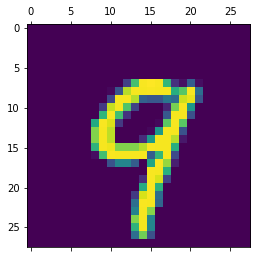

In [71]:
plt.matshow(x_test[12])
print(np.argmax(y_predict[12]))

In [74]:
y_predicted_labels=[np.argmax(i) for i in y_predict]
print(y_predicted_labels[:5])

[7, 2, 1, 0, 4]


In [75]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    3,    2,    0,    8,    7,    3,    3,    1],
       [   0, 1114,    4,    2,    0,    1,    3,    2,    9,    0],
       [   3,    8,  935,   13,    7,    4,   11,    9,   37,    5],
       [   2,    0,   21,  920,    1,   20,    2,   10,   24,   10],
       [   1,    1,    8,    2,  904,    0,    8,    4,   10,   44],
       [   6,    3,    7,   32,   10,  770,   10,    9,   38,    7],
       [   8,    3,   10,    1,    7,   12,  911,    2,    4,    0],
       [   1,    6,   25,    3,    7,    1,    0,  947,    2,   36],
       [   5,    8,    6,   16,    9,   16,    7,   10,  883,   14],
       [   7,    7,    3,    7,   18,    5,    0,   14,    8,  940]])>

Text(69.0, 0.5, 'Truth')

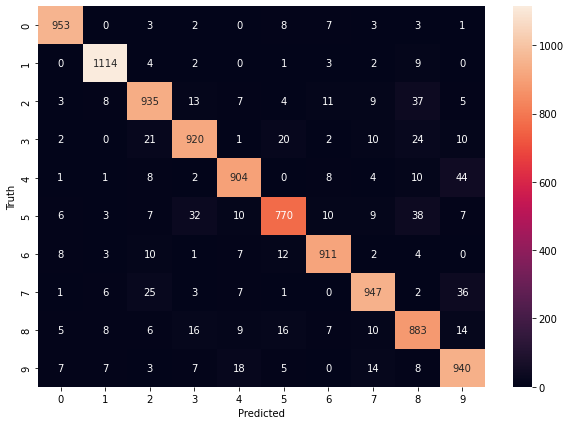

In [78]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2785 - accuracy: 0.9204
Epoch 2/10
1279/1875 [===================>..........] - ETA: 1s - loss: 0.1292 - accuracy: 0.9614

In [86]:
y_predict=model.predict(x_test_flatten)
print(y_predict[0])
y_predicted_labels=[np.argmax(i) for i in y_predict]
print(y_predicted_labels[:5])

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

[1.1863112e-03 1.3760650e-06 4.6251506e-02 2.1636206e-01 1.2907761e-07
 4.8016085e-05 3.0935103e-12 9.9996084e-01 2.0502493e-01 7.5721741e-03]
[7, 2, 1, 0, 4]


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    2,    0,    0,    0,    1,    1,    2,    0],
       [   0, 1124,    2,    1,    0,    1,    2,    0,    5,    0],
       [   2,    2,  997,    8,    3,    0,    2,    7,   11,    0],
       [   1,    1,    5,  983,    0,    4,    0,    5,    5,    6],
       [   1,    0,    1,    1,  962,    1,    6,    2,    2,    6],
       [   3,    1,    0,    5,    3,  867,    4,    2,    4,    3],
       [   6,    4,    1,    1,    9,    2,  934,    1,    0,    0],
       [   2,    8,   10,    3,    1,    0,    0,  992,    6,    6],
       [   8,    0,    2,    8,    7,    3,    4,    5,  933,    4],
       [   2,    3,    0,    2,   18,    3,    0,    4,    2,  975]])>

Text(69.0, 0.5, 'Truth')

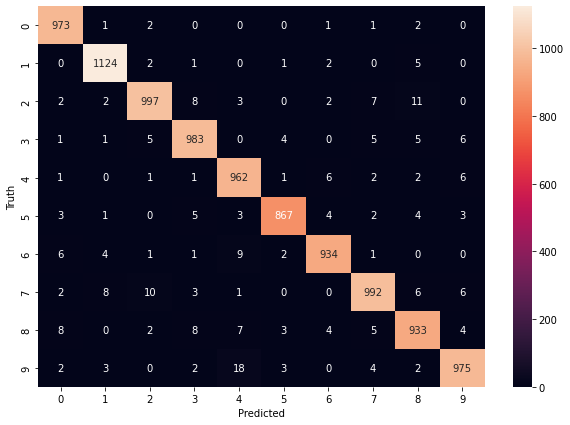

In [87]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
